# Brief Dataset Analysis:

In [135]:
import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm
import random
import matplotlib.pyplot as plt


In [136]:
#read all the data:
items = pd.read_csv("dressipi_recsys2022/item_features.csv")
candidate = pd.read_csv("dressipi_recsys2022/candidate_items.csv")
purchase =  pd.read_csv("dressipi_recsys2022/train_purchases.csv")
sessions =  pd.read_csv("dressipi_recsys2022/train_sessions.csv")
sessions_test = pd.read_csv("dressipi_recsys2022/test_final_sessions.csv")
leaderboard = pd.read_csv("dressipi_recsys2022/test_leaderboard_sessions.csv")

**Number of distinct Items**

In [137]:
items.item_id.nunique()

23691

**Number of sessions on Test and Train**

In [138]:
sessions.session_id.nunique()

1000000

In [139]:
sessions_test.session_id.nunique()

50000

In [140]:
leaderboard.session_id.nunique()

50000

**Most seen items**

In [141]:
important_items = sessions.item_id.value_counts()
important_items

8060     14714
26853    13192
2447      9774
1644      6955
19882     6947
         ...  
15176        1
17347        1
6150         1
3509         1
21419        1
Name: item_id, Length: 23496, dtype: int64

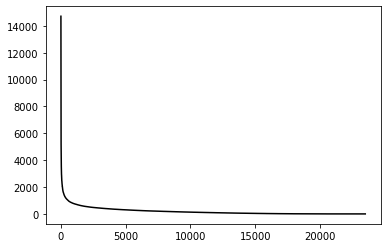

In [142]:
plt.plot(range(len(important_items)),important_items, color = "black")

In [143]:
sessions

,session_id,item_id,date
0,3,9655,2020-12-18 21:25:00.373
1,3,9655,2020-12-18 21:19:48.093
2,13,15654,2020-03-13 19:35:27.136
3,18,18316,2020-08-26 19:18:30.833
4,18,2507,2020-08-26 19:16:31.211
...,...,...,...
4743815,4440001,20409,2020-10-30 23:37:20.658
4743816,4440001,14155,2020-10-30 23:31:56.607
4743817,4440001,14303,2020-10-30 23:36:17.934
4743818,4440001,27852,2020-10-30 23:39:55.186


**Session Length**

In [144]:
session_length = sessions.groupby(['session_id']).date.nunique()
session_length.values

array([ 2,  1,  3, ...,  1,  7, 19], dtype=int64)

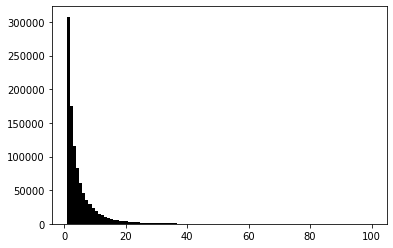

In [145]:
plt.hist(session_length.values, bins = 100, color = "black")
plt.show()

In [146]:
sorted_session_length = sorted(session_length.values)

**Most Relevant Item features**

In [148]:
#most relevant categories ids
relevant_features = items.feature_category_id.value_counts()
relevant_features[0:20]

56    23691
47    23691
50    23077
68    23038
61    22512
72    20499
69    20450
7     20416
55    17779
30    15412
4     14954
63    14588
32    14277
26    14270
73    13339
19    12308
17    12103
65    10960
46    10102
5      9488
Name: feature_category_id, dtype: int64

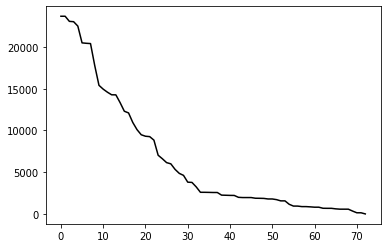

In [149]:
plt.plot(range(len(relevant_features)),relevant_features, color = "black")

In [150]:
#most relevant feature value ids
relevant_values = items.feature_value_id.value_counts()
relevant_values[0:20]

365    19472
75     12582
706    12353
378    11939
861    11651
618    11628
544    10958
267    10339
825     9097
559     8960
793     8938
521     8491
605     8382
268     8248
902     6875
351     6497
549     6169
592     6042
901     5494
462     5413
Name: feature_value_id, dtype: int64

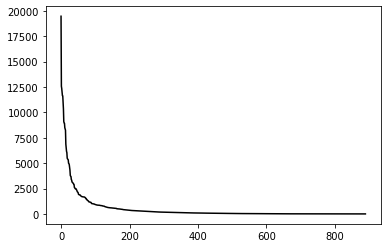

In [151]:
plt.plot(range(len(relevant_values)),relevant_values, color = "black")

**Maximum Amount of Features**

In [152]:
items.groupby(['item_id']).nunique().max()

feature_category_id    27
feature_value_id       33
dtype: int64

**Minimum Amount of Features**

In [153]:
items.groupby(['item_id']).nunique().min()

feature_category_id    2
feature_value_id       2
dtype: int64

**Average Session Length**

In [154]:
session_length = sessions.groupby(["session_id"]).nunique()

In [155]:
session_length.mean()

item_id    4.108850
date       4.743159
dtype: float64

In [156]:
repeated_items = session_length[session_length.date > session_length.item_id]

In [157]:
len(repeated_items)

284910

Which represents a fraction of around 28% of the sessions.

**Let's analyse the purchase dataset**

**First Top Sellers**

In [158]:
purchase.item_id.value_counts()

8060     8451
26853    3829
19882    3355
8622     2745
2447     2726
         ... 
20141       1
24646       1
1581        1
14660       1
3302        1
Name: item_id, Length: 18907, dtype: int64

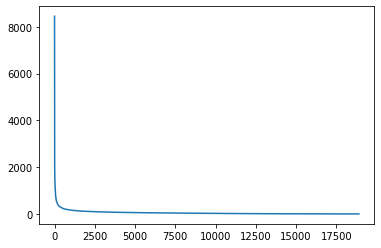

In [159]:
plt.plot(range(len(purchase.item_id.value_counts())),purchase.item_id.value_counts())

**Test Session Analysis**

In [160]:
sessions_test

,session_id,item_id,date
0,61,27088,2021-06-01 08:12:39.664
1,96,11693,2021-06-19 17:48:05.227
2,96,18298,2021-06-19 17:49:08.589
3,96,4738,2021-06-19 17:49:15.838
4,96,495,2021-06-19 17:49:20.88
...,...,...,...
226133,4439648,7154,2021-06-14 08:03:19.024
226134,4439675,23067,2021-06-01 12:21:07.959
226135,4439868,26085,2021-06-16 22:18:27.509
226136,4439966,19483,2021-06-06 20:05:06.457


In [161]:
important_items = sessions_test.item_id.value_counts()
important_items

23412    1185
8060     1119
6491     1003
4130      943
16922     941
         ... 
6804        1
8141        1
4547        1
6270        1
26218       1
Name: item_id, Length: 5648, dtype: int64

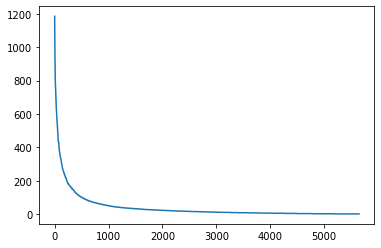

In [162]:
plt.plot(range(len(important_items)),important_items)